# Shuffle `cell-type`/`Cluster`

#### Hypothesis: NCEM is reliant on cell-type annotation. We hypothesize that annotation accuracy has a great effect on NCEM output

Aim: Simulate imperfect cell type annotation by shuffling cell types (in different percentages of cells) to investigate NCEM sensibility towards cell-type annotation

Input:
 - Hartmann raw-data in correct file and directory structure as described in `hartmann_data-preparation.ipynb`

Output:
 - Sender_receiver_effects matrix
   - A cell-type x cell-type x features matrix with the interaction terms representing the sender-receiver effects between cells
 - Custom sender_receiver_effects() matrices
    1. L1 norm of indicator function of significant sender-receiver interactions on feature-level
        - In other words, for each sender-receiver cell-type pair, the sum of all significant features (hypothesis test on interaction terms: FDR corrected Wald test)
    2. L2 norm of sender-receiver interaction terms on feature-level
        - In other words, for each sender-receiver cell-type pair, the euclidean distance of the data point in all feature dimensions



In [1]:
import ncem

import os
import scipy as sp
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

import helper
import pickle

import random

random.seed(42)
print(random.random()) 

2023-02-18 16:06:59.382269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-18 16:06:59.576945: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-02-18 16:07:00.241373: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-18 16:07:00.241429: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

sender_receiver_custom module is loaded!
0.6394267984578837


### Standard NCEM

/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 50.06it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



2023-02-18 16:07:15.299434: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 16:07:15.325318: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 16:07:15.325492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-18 16:07:15.326783: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

using ols parameters.
calculating inv fim.


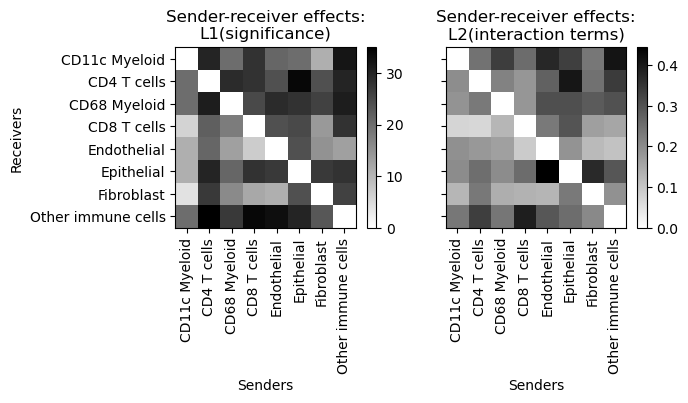

In [2]:
ncem_interactions = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)

### 0.1% cells' cell-type randomized

In [3]:
# Make csv placeholder file
os.system("cp ../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv ../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv")

# Read csv
new_csv = pd.read_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", header=0)

# Shuffle `Cluster` column
new_csv['Cluster'] = helper.shuffle(new_csv, 'Cluster', 'Cluster', frac=0.001)

# Write new csv file
new_csv.to_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", index=False)

Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 50.43it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



100%|█████████▉| 6351/6374 [00:27<00:00, 231.84it/s]


using ols parameters.
calculating inv fim.


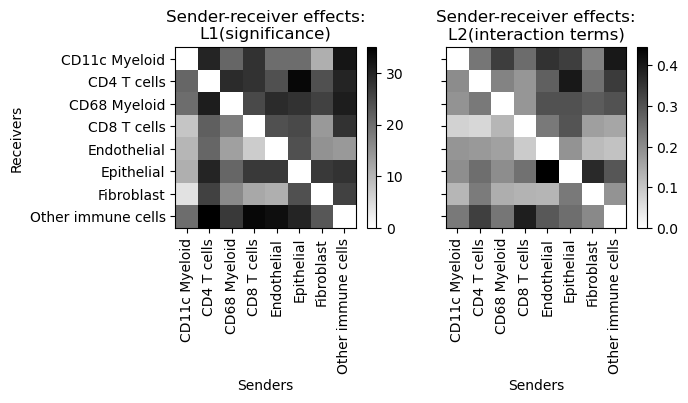

In [4]:
ncem_interactions_001 = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


### 1% cells' cell type randomized

In [5]:
# Read csv
new_csv = pd.read_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv", header=0)

# Shuffle `Cluster` column
new_csv['Cluster'] = helper.shuffle(new_csv, 'Cluster', 'Cluster', frac=0.01)

# Write new csv file
new_csv.to_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", index=False)

Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 52.75it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



100%|█████████▉| 6351/6374 [00:27<00:00, 232.11it/s]


using ols parameters.
calculating inv fim.


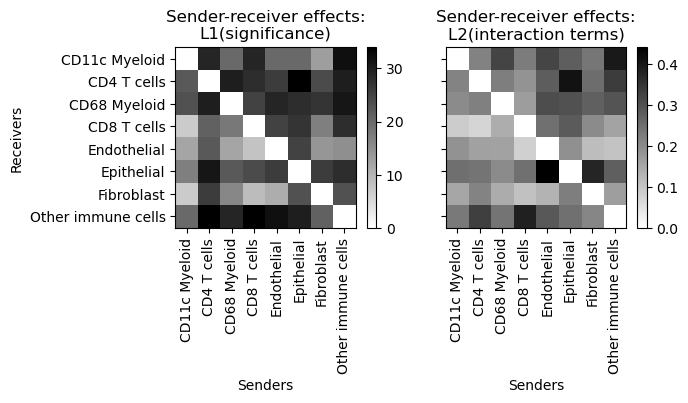

In [6]:
ncem_interactions_01 = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


### 10% cells' cell type randomized

In [7]:
# Read csv
new_csv = pd.read_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv", header=0)

# Shuffle `Cluster` column
new_csv['Cluster'] = helper.shuffle(new_csv, 'Cluster', 'Cluster', frac=0.10)

# Write new csv file
new_csv.to_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", index=False)

Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 51.59it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



100%|█████████▉| 6351/6374 [00:27<00:00, 230.08it/s]


using ols parameters.
calculating inv fim.


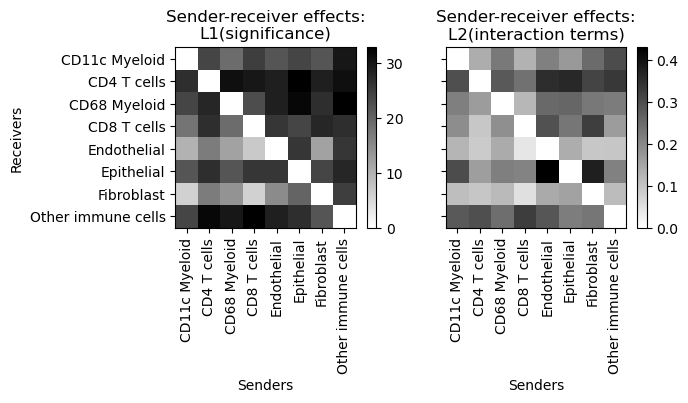

In [9]:
ncem_interactions_01 = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


### 50% cells' cell type randomized

In [10]:
# Read csv
new_csv = pd.read_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv", header=0)

# Shuffle `Cluster` column
new_csv['Cluster'] = helper.shuffle(new_csv, 'Cluster', 'Cluster', frac=0.5)

# Write new csv file
new_csv.to_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", index=False)

Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 50.53it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



100%|█████████▉| 6351/6374 [00:27<00:00, 228.61it/s]


using ols parameters.
calculating inv fim.


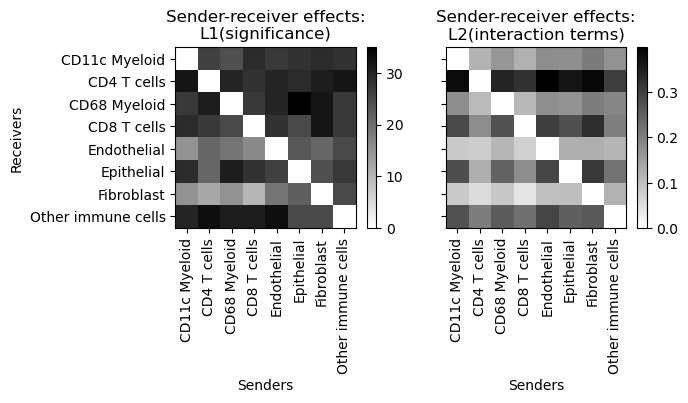

In [11]:
ncem_interactions_05 = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


### 100% cells' cell type randomized

In [12]:
# Read csv
new_csv = pd.read_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv", header=0)

# Shuffle `Cluster` column
new_csv['Cluster'] = helper.shuffle(new_csv, 'Cluster', 'Cluster', frac=1)

# Write new csv file
new_csv.to_csv("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv", index=False)

Loading data from raw files
registering celldata


/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/ncem/data.py:2389: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  celldata = AnnData(
/home/ifichtner/mambaforge/envs/squidpyLatest/lib/python3.8/site-packages/anndata/_core/anndata.py:121: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


collecting image-wise celldata
adding graph-level covariates


100%|██████████| 58/58 [00:01<00:00, 51.77it/s]


Loaded 58 images with complete data from 4 patients over 63747 cells with 36 cell features and 8 distinct celltypes.
Mean of mean node degree per images across images: 4.416036
Using split method: node. 
 Train-test-validation split is based on total number of nodes per patients over all images.

Excluded 0 cells with the following unannotated cell type: [None] 

Whole dataset: 63747 cells out of 58 images from 4 patients.
Test dataset: 6376 cells out of 58 images from 4 patients.
Training dataset: 51914 cells out of 58 images from 4 patients.
Validation dataset: 5738 cells out of 58 images from 4 patients. 



100%|█████████▉| 6351/6374 [00:27<00:00, 230.37it/s]


using ols parameters.
calculating inv fim.


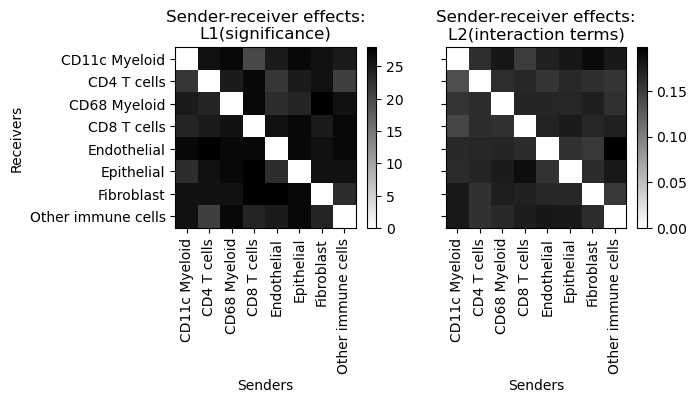

In [13]:
ncem_interactions_1 = helper.ncem_sender_receiver_interactions_Hartmann(
    data_loader='hartmann',
    data_path='../input-data/raw-data/Hartmann-2021/',
    radius=35,
    n_eval_nodes=10,
    qval_thresh=0.05,
    l1_thresh=0,
    fc_thresh=0,
    l2_thresh=0
)


### Recover original csv

In [14]:
os.remove("../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv")

os.rename(
    "../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell_BACKUP.csv",
    "../input-data/raw-data/Hartmann-2021/scMEP_MIBI_singlecell/scMEP_MIBI_singlecell.csv",
)

# Save the matrices

In [ ]:
# with open('../output-data/hartmann/ncem/ncem_interactions_output', 'wb') as filehandler:
  # pickle.dump(ncem_interactions, filehandler)

### (FAILED) Approach 2: Modify anndata `interpreter.data.delldata.obs['Cluster']`

- After loading data
- Before running NCEM

In [ ]:
# # Shuffle `Cluster`
# new_Cluster = helper.shuffle(interpreter.data.celldata.obs, 'Cluster', 'Cluster', frac=1.0)
# interpreter.data.celldata.obs['Cluster'] = new_Cluster


# # Make `Cluster_preprocessed`
# untransl = pd.Series(list(new_Cluster), dtype='category')

# transl = untransl.map(interpreter.data.cell_type_merge_dict)
# interpreter.data.celldata.obs['Cluster_preprocessed'] = pd.Categorical(list(transl))